In [1]:
import os
import random
import time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import matplotlib.pyplot as plt

from datetime import timedelta
from multiprocessing import cpu_count
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid

############################## Write your code ##############################
##### Optional
# Import more if you may
# Note: If there is an import error when grading, you will get F
# Hint: Stick to the often used packages
#############################################################################

In [2]:
SEED = 42

os.environ['PYTHONHASHSEED'] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.benchmark = True

GPU = 0

device = torch.device(f'cuda:{GPU}' if torch.cuda.is_available() else 'cpu')

def fake_z(batch_size, noise, device):
    return torch.randn(batch_size, noise, device=device)

In [3]:
transform = transforms.Compose([
############################## Write your code ##############################
# Transform your data
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))


#############################################################################
])

train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
############################## Write your code ##############################
##### Optional
# Change BATCH_SIZE if you may
BATCH_SIZE = 2 ** 6

# Change NUM_WORKERS if you may
if cpu_count() > 5:
    NUM_WORKERS = cpu_count() // 2
elif cpu_count() < 2:
    NUM_WORKERS = 0
else:
    NUM_WORKERS = 2
#############################################################################
    
trainloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
testloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS)

In [5]:
############################## Write your code ##############################
# Build Generator
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        torch.nn.init.xavier_uniform_(self.fc.weight)
        pass

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(out)
        x = out.view(out.size(0), -1)
        x = self.fc(out)

        output = x
        return output
#############################################################################

In [6]:
############################## Write your code ##############################
# Build Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        torch.nn.init.xavier_uniform_(self.fc.weight)
        #self.lin1 = nn.Linear(28 * 28, 512)
        #self.lin2 = nn.Linear(512, 256)
        #self.lin3 = nn.Linear(256, 1)
        pass

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(out)
        x = out.view(out.size(0), -1)
        x = self.fc(out)
        #x = F.dropout(F.relu(self.lin1(x), 0.2), 0.3)
        #x = F.dropout(F.relu(self.lin2(x), 0.2), 0.3)
        #x = F.tanh(self.lin3(x))
        output = x
        return output
#############################################################################

In [7]:
############################## Write your code ##############################
# Set your model(s), optimizer(s), and loss function(s)

learning_rate = 0.0001



generator = Generator().to(device)
discriminator = Discriminator().to(device)

gen_optimizer = optim.Adam(generator.parameters(), lr=learning_rate)
dis_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate)

#criterion = nn.BCEWithLogitsLoss().to(device)
criterion = torch.nn.CrossEntropyLoss().to(device)

#############################################################################

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch [5/200] Elapsed time: 0:01:55.355130
Epoch [10/200] Elapsed time: 0:03:51.084523
Epoch [15/200] Elapsed time: 0:05:48.247449
Epoch [20/200] Elapsed time: 0:07:45.244831


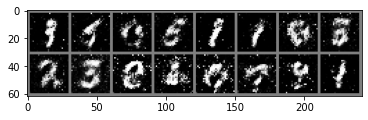

Epoch [25/200] Elapsed time: 0:09:43.548470
Epoch [30/200] Elapsed time: 0:11:41.286066
Epoch [35/200] Elapsed time: 0:13:37.901835
Epoch [40/200] Elapsed time: 0:15:35.075674


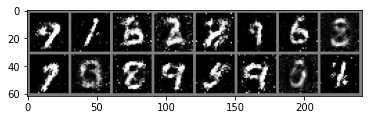

Epoch [45/200] Elapsed time: 0:17:32.537245
Epoch [50/200] Elapsed time: 0:19:29.311361
Epoch [55/200] Elapsed time: 0:21:26.728270
Epoch [60/200] Elapsed time: 0:23:24.016054


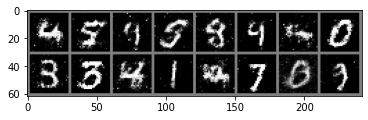

Epoch [65/200] Elapsed time: 0:25:21.587029
Epoch [70/200] Elapsed time: 0:27:19.203211
Epoch [75/200] Elapsed time: 0:29:17.233232
Epoch [80/200] Elapsed time: 0:31:14.908496


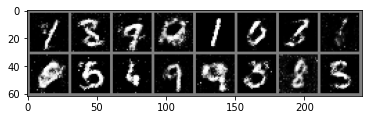

Epoch [85/200] Elapsed time: 0:33:13.283193
Epoch [90/200] Elapsed time: 0:35:11.925900
Epoch [95/200] Elapsed time: 0:37:11.203477
Epoch [100/200] Elapsed time: 0:39:09.563657


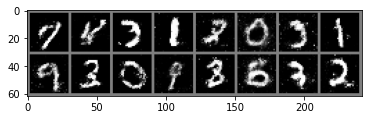

Epoch [105/200] Elapsed time: 0:41:08.454330
Epoch [110/200] Elapsed time: 0:43:06.681319
Epoch [115/200] Elapsed time: 0:45:04.403926
Epoch [120/200] Elapsed time: 0:47:01.885258


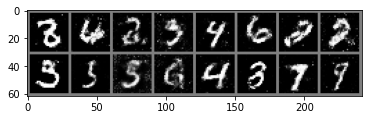

Epoch [125/200] Elapsed time: 0:49:00.443973
Epoch [130/200] Elapsed time: 0:50:58.567025
Epoch [135/200] Elapsed time: 0:52:56.962811
Epoch [140/200] Elapsed time: 0:54:54.965147


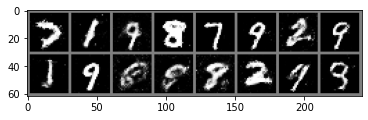

Epoch [145/200] Elapsed time: 0:56:54.272477
Epoch [150/200] Elapsed time: 0:58:52.699623
Epoch [155/200] Elapsed time: 1:00:50.586639
Epoch [160/200] Elapsed time: 1:02:47.365463


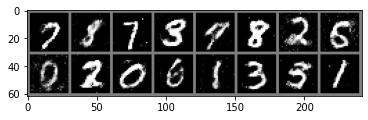

Epoch [165/200] Elapsed time: 1:04:45.010429
Epoch [170/200] Elapsed time: 1:06:41.913084
Epoch [175/200] Elapsed time: 1:08:39.127481
Epoch [180/200] Elapsed time: 1:10:36.408179


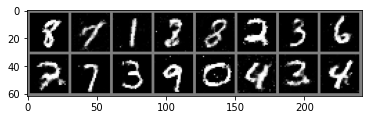

Epoch [185/200] Elapsed time: 1:12:33.151085
Epoch [190/200] Elapsed time: 1:14:27.985652
Epoch [195/200] Elapsed time: 1:16:23.567178
Epoch [200/200] Elapsed time: 1:18:18.538180


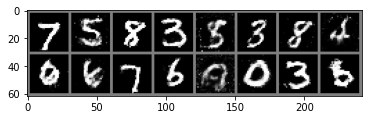

In [8]:
############################## Write your code ##############################
##### Optional
# Change the training process below so it would fit your model
# Note: You must print 16 generated images every 20 epochs to show progress
EPOCHS = 200
noise = 100
start = time.time()

for ep in range(EPOCHS):

    generator.train()
    discriminator.train()

    for image, _ in trainloader:
        batch_size = image.size(0)

        image = image.to(device)
 
        real_label = torch.ones(batch_size).view(-1, 1).to(device)
        fake_label = torch.zeros(batch_size).view(-1, 1).to(device)

        dis_optimizer.zero_grad()

        real_output = discriminator(image.view(-1, 28 * 28))
        fake_output = discriminator(generator(fake_z(batch_size, noise, device)))

        real_loss = criterion(real_output, real_label)
        fake_loss = criterion(fake_output, fake_label)
        dis_loss = real_loss + fake_loss
  
        dis_loss.backward()
        dis_optimizer.step()

        gen_optimizer.zero_grad()
  
        fake_output = discriminator(generator(fake_z(batch_size, noise, device)))
  
        gen_loss = criterion(fake_output, real_label)
  
        gen_loss.backward()
        gen_optimizer.step()

    # Print time spent every 5 epochs
    if (ep + 1) % 5 == 0:
        print('Epoch [{}/{}] Elapsed time: {}'.format(ep + 1, EPOCHS, timedelta(seconds=time.time() - start)))

    # Generate 16 images every 20 epochs
    if (ep + 1) % 20 == 0:
        discriminator.eval()
        generator.eval()

        with torch.no_grad():
            image = make_grid(generator(fake_z(16, noise, device)).view(-1, 1, 28, 28).detach().cpu())
            image = (image + 1) / 2
            image = image.numpy()
            image = np.transpose(image, (1, 2, 0))
            plt.imshow(image)
            plt.show()
#############################################################################